# Mushroom Classification


Safe to eat or deadly poison?

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.


# Steps
1) Importing libraries

2) Read Data

3) Data Preprocessing

4) Feature Engineering

5) Model Training

In [46]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
import joblib as jb

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

## Read Data

In [2]:
data=pd.read_csv('files/train/raw/train.csv')

In [3]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,f,y,n,t,n,f,c,b,w,...,s,w,w,p,w,t,e,w,c,w
1,e,x,f,g,t,n,f,c,b,p,...,s,p,w,p,w,o,p,k,y,d
2,e,k,s,w,f,n,f,w,b,p,...,k,w,w,p,w,t,p,w,s,g
3,p,x,f,g,f,f,f,c,b,p,...,k,n,n,p,w,o,l,h,y,d
4,p,f,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,s,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681,p,x,y,y,f,f,f,c,b,h,...,k,b,b,p,w,o,l,h,v,g
5682,p,f,y,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,n,v,g
5683,p,x,f,w,f,c,f,w,n,u,...,s,w,w,p,w,o,p,n,s,d
5684,e,x,s,n,f,n,f,c,b,w,...,y,n,n,p,w,t,p,w,y,p


## Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     5686 non-null   object
 1   cap-shape                 5686 non-null   object
 2   cap-surface               5686 non-null   object
 3   cap-color                 5686 non-null   object
 4   bruises                   5686 non-null   object
 5   odor                      5686 non-null   object
 6   gill-attachment           5686 non-null   object
 7   gill-spacing              5686 non-null   object
 8   gill-size                 5686 non-null   object
 9   gill-color                5686 non-null   object
 10  stalk-shape               5686 non-null   object
 11  stalk-root                5686 non-null   object
 12  stalk-surface-above-ring  5686 non-null   object
 13  stalk-surface-below-ring  5686 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.describe(include="all")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686,...,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,2937,2591,2250,1598,3333,2473,5535,4769,3932,1201,...,3464,3106,3052,5686,5538,5254,2773,1645,2878,2222


In [6]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [7]:
data["class"].value_counts()

class
e    2937
p    2749
Name: count, dtype: int64

In [8]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Feature Engineering

In [9]:
# Target and labels
df=data.copy()
y =df['class'].copy()

X =df.drop('class',axis=1).copy()


In [10]:
X_train,X_test,y_train,y_test= train_test_split(X,y, train_size=0.7, shuffle=True , random_state=123)

In [11]:
X_train.to_csv('files/train/raw/x_test.csv',index=False)
y_train.to_csv('files/train/raw/y_test.csv',index=False)


X_test.to_csv('files/evaluate/raw/x_test.csv',index=False)
y_test.to_csv('files/evaluate/raw/y_test.csv',index=False)

In [12]:
X_train.shape

(3980, 22)

In [13]:
# Encoding feature
encoder =OrdinalEncoder()
X_encode=encoder.fit(X_train)
jb.dump(X_encode,'files/train/model/train_encode_model.pkl')
X_encode=encoder.transform(X_train)


X_train=pd.DataFrame(X_encode, columns=X_train.columns)

In [14]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5.0,3.0,3.0,1.0,5.0,1.0,0.0,0.0,10.0,1.0,...,2.0,6.0,3.0,0.0,2.0,1.0,4.0,3.0,5.0,0.0
1,5.0,3.0,9.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
2,2.0,3.0,3.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,...,1.0,4.0,6.0,0.0,2.0,1.0,2.0,1.0,4.0,0.0
3,2.0,0.0,2.0,1.0,5.0,1.0,0.0,0.0,5.0,1.0,...,2.0,6.0,3.0,0.0,2.0,1.0,4.0,2.0,4.0,0.0
4,2.0,3.0,4.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,...,2.0,6.0,6.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975,2.0,3.0,2.0,1.0,5.0,1.0,0.0,0.0,9.0,1.0,...,2.0,6.0,6.0,0.0,2.0,1.0,4.0,3.0,5.0,0.0
3976,2.0,3.0,2.0,1.0,5.0,1.0,0.0,0.0,7.0,1.0,...,2.0,7.0,3.0,0.0,2.0,1.0,4.0,3.0,5.0,0.0
3977,2.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,7.0,0.0,...,1.0,0.0,6.0,0.0,2.0,1.0,2.0,1.0,4.0,4.0
3978,5.0,2.0,8.0,0.0,1.0,1.0,1.0,1.0,9.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,3.0,0.0


In [15]:
X_train.to_csv('files/train/processed/encoded_processed.csv',index=False)

In [16]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5.0,3.0,3.0,1.0,5.0,1.0,0.0,0.0,10.0,1.0,...,2.0,6.0,3.0,0.0,2.0,1.0,4.0,3.0,5.0,0.0
1,5.0,3.0,9.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
2,2.0,3.0,3.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,...,1.0,4.0,6.0,0.0,2.0,1.0,2.0,1.0,4.0,0.0
3,2.0,0.0,2.0,1.0,5.0,1.0,0.0,0.0,5.0,1.0,...,2.0,6.0,3.0,0.0,2.0,1.0,4.0,2.0,4.0,0.0
4,2.0,3.0,4.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,...,2.0,6.0,6.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975,2.0,3.0,2.0,1.0,5.0,1.0,0.0,0.0,9.0,1.0,...,2.0,6.0,6.0,0.0,2.0,1.0,4.0,3.0,5.0,0.0
3976,2.0,3.0,2.0,1.0,5.0,1.0,0.0,0.0,7.0,1.0,...,2.0,7.0,3.0,0.0,2.0,1.0,4.0,3.0,5.0,0.0
3977,2.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,7.0,0.0,...,1.0,0.0,6.0,0.0,2.0,1.0,2.0,1.0,4.0,4.0
3978,5.0,2.0,8.0,0.0,1.0,1.0,1.0,1.0,9.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,3.0,0.0


<AxesSubplot: >

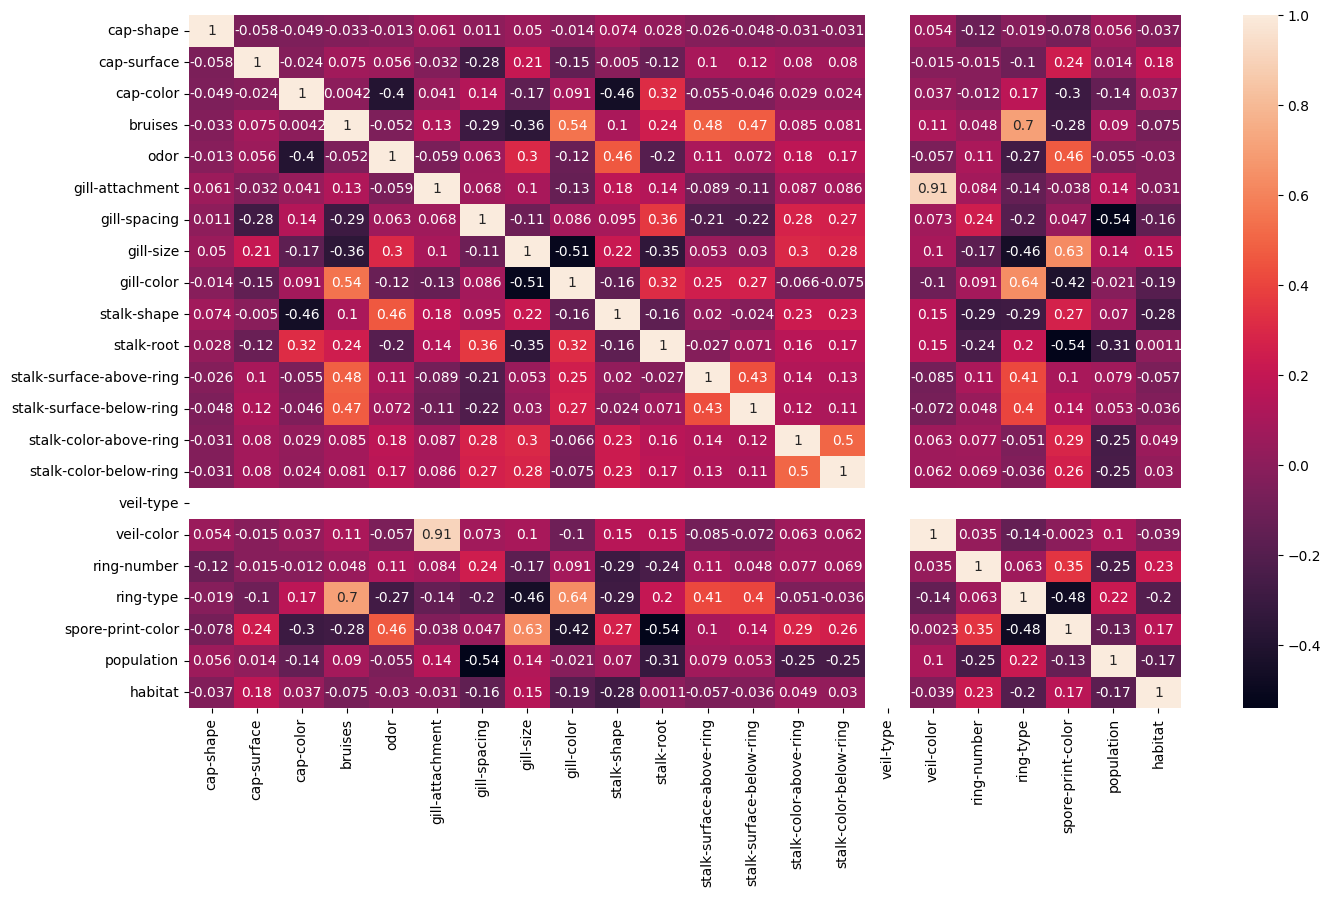

In [17]:
plt.figure(figsize=(16,9))
sns.heatmap(X_train.corr(),annot=True)

In [18]:
# feature  selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)

In [20]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                       Specs        Score
8                 gill-color  2956.039698
18                 ring-type   977.388758
7                  gill-size   803.150393
3                    bruises   613.103224
10                stalk-root   585.248100
6               gill-spacing   419.053995
21                   habitat   403.276712
19         spore-print-color   166.180720
20                population   155.473129
11  stalk-surface-above-ring   112.352625


In [21]:
feature=featureScores.nlargest(10,'Score')
feature

,Specs,Score
8,gill-color,2956.039698
18,ring-type,977.388758
7,gill-size,803.150393
3,bruises,613.103224
10,stalk-root,585.248100
6,gill-spacing,419.053995
21,habitat,403.276712
19,spore-print-color,166.180720
20,population,155.473129
11,stalk-surface-above-ring,112.352625


In [22]:
feature_list=feature['Specs'].to_list()

In [57]:
import joblib as jb
jb.dump(feature_list,'files/train/model/featureselected_model.pkl')

['gill-color',
 'ring-type',
 'gill-size',
 'bruises',
 'stalk-root',
 'gill-spacing',
 'habitat',
 'spore-print-color',
 'population',
 'stalk-surface-above-ring']

In [24]:
featuer_selected=X_train[feature_list]
featuer_selected

,gill-color,ring-type,gill-size,bruises,stalk-root,gill-spacing,habitat,spore-print-color,population,stalk-surface-above-ring
0,10.0,4.0,0.0,1.0,1.0,0.0,0.0,3.0,5.0,2.0
1,5.0,4.0,0.0,1.0,2.0,0.0,3.0,3.0,2.0,2.0
2,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0
3,5.0,4.0,0.0,1.0,1.0,0.0,0.0,2.0,4.0,2.0
4,0.0,0.0,1.0,0.0,0.0,0.0,2.0,7.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...
3975,9.0,4.0,0.0,1.0,1.0,0.0,0.0,3.0,5.0,2.0
3976,7.0,4.0,0.0,1.0,1.0,0.0,0.0,3.0,5.0,2.0
3977,7.0,2.0,0.0,0.0,1.0,0.0,4.0,1.0,4.0,1.0
3978,9.0,4.0,1.0,0.0,1.0,1.0,0.0,3.0,3.0,2.0


In [25]:
featuer_selected.to_csv('files/train/processed/featureSelected_X_train.csv',index=False)

In [26]:
# class encoding
y_train.value_counts()
y_train=y_train.replace({'e':1,'p':0})    # 1 means edible  , 0 means poison

##  Model Training

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lor=LogisticRegression()
lor.fit(featuer_selected,y_train)
print('Train score:',lor.score(featuer_selected,y_train)* 100)

Train score: 93.89447236180905


In [29]:
import joblib as jb
jb.dump(lor,'files/train/model/lor.pkl')

['files/train/model/lor.pkl']

## Prediction

In [59]:
##load x test and y test 
Feature_selection =jb.load('files/train/model/featureselected_model.pkl')
encode_model =jb.load('files/train/model/train_encode_model.pkl')
model=jb.load('files/train/model/lor.pkl')Feature_selection

['gill-color',
 'ring-type',
 'gill-size',
 'bruises',
 'stalk-root',
 'gill-spacing',
 'habitat',
 'spore-print-color',
 'population',
 'stalk-surface-above-ring']

In [31]:
encode_data=encode_model.transform(X_test)
encode_data=pd.DataFrame(encode_data, columns=X_test.columns)
encode_data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,4.0,1.0
1,2.0,2.0,2.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,...,1.0,6.0,6.0,0.0,2.0,1.0,0.0,7.0,4.0,4.0
2,5.0,0.0,2.0,1.0,5.0,1.0,0.0,0.0,10.0,1.0,...,2.0,6.0,6.0,0.0,2.0,1.0,4.0,3.0,4.0,0.0
3,2.0,2.0,8.0,0.0,5.0,1.0,1.0,0.0,7.0,1.0,...,0.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,3.0,1.0
4,2.0,0.0,8.0,0.0,5.0,1.0,1.0,0.0,5.0,1.0,...,0.0,7.0,7.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,2.0,3.0,3.0,1.0,5.0,1.0,0.0,0.0,5.0,1.0,...,2.0,7.0,6.0,0.0,2.0,1.0,4.0,3.0,5.0,0.0
1702,2.0,2.0,8.0,0.0,5.0,1.0,1.0,0.0,3.0,1.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,3.0,1.0
1703,5.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,7.0,0.0,...,1.0,6.0,0.0,0.0,2.0,1.0,2.0,1.0,4.0,1.0
1704,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,10.0,0.0,...,1.0,7.0,7.0,0.0,2.0,2.0,4.0,7.0,3.0,1.0


In [60]:
featuer_selected=encode_data[Feature_selection]
featuer_selected

,gill-color,ring-type,gill-size,bruises,stalk-root,gill-spacing,habitat,spore-print-color,population,stalk-surface-above-ring
0,4.0,4.0,1.0,1.0,3.0,0.0,1.0,2.0,4.0,2.0
1,0.0,0.0,1.0,0.0,0.0,0.0,4.0,7.0,4.0,1.0
2,10.0,4.0,0.0,1.0,1.0,0.0,0.0,3.0,4.0,2.0
3,7.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,3.0,2.0
4,5.0,0.0,0.0,0.0,3.0,1.0,1.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
1701,5.0,4.0,0.0,1.0,1.0,0.0,0.0,3.0,5.0,2.0
1702,3.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,3.0,0.0
1703,7.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,4.0,1.0
1704,10.0,4.0,0.0,0.0,0.0,1.0,1.0,7.0,3.0,2.0


In [61]:
y_pred=pd.DataFrame(model.predict(featuer_selected))
y_pred

,0
0,0
1,0
2,1
3,1
4,1
...,...
1701,1
1702,1
1703,0
1704,1


In [62]:
y_test=y_test.replace({'e':1,'p':0})

In [63]:
print(classification_report(y_pred,y_test))
cm=confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       802
           1       0.95      0.92      0.93       904

    accuracy                           0.93      1706
   macro avg       0.93      0.93      0.93      1706
weighted avg       0.93      0.93      0.93      1706



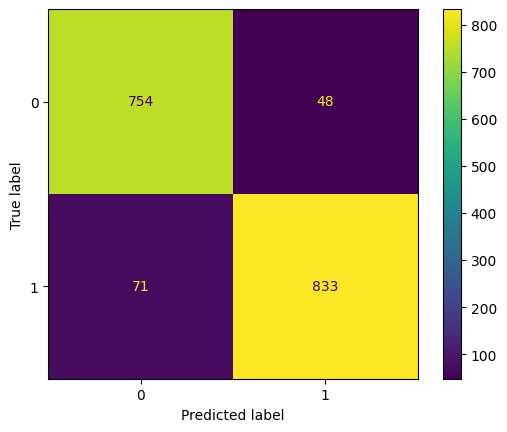

In [64]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [53]:
y_pred=y_pred.replace({1:'edible',0:'Poision'})

In [54]:
y_pred

,0
0,Poision
1,Poision
2,edible
3,edible
4,edible
...,...
1701,edible
1702,edible
1703,Poision
1704,edible


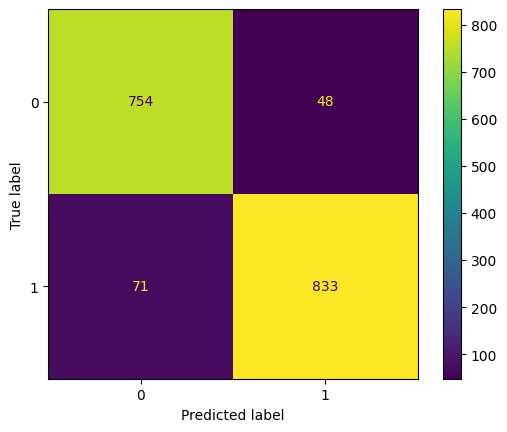

In [66]:
disp.plot()